In [1]:
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
#copybook_data[ ['leading_whitespace','new_leading_whitespace'] ]
#metadata = pd.read_excel( '2022-12-15_IDMS_table_descriptions.xlsx', index_col=0 )
#metadata.index.name = "table_index"
#wanted_subsystem = "DISCREPANCY PROCESSING AND ACCOUNT INFORMATION INQUIRY"
#metadata[ metadata[ wanted_subsystem ] == 1 ].copy()

In [4]:
data = pd.read_excel( "2022-12-08_PLAS_IDMS_data_structure_WITH_VALID_VALUES.xlsx", index_col=0 )

In [5]:
data = data.rename( columns={ 'indent_number': 'data_level'  } )

In [6]:
data.shape

(89288, 18)

In [7]:
data.head()

,table_name,table_index,table_vers,table_created_date,table_updated_date,field_name,data_type,data_level,indent_space_count,declaration_step,end,raw_field_name,BLANK ON,INDEXED BY,OCCURS,OLQ,REDEFINES,VALUE
0,ABSDOMN,0,1,1987-09-29,1987-10-15,ST-CTY-CDE-FMHA,NaN,5,3,100,DISPLAY,ST-CTY-CDE-FMHA-4541,NaN,NaN,NaN,NaN,NaN,NaN
1,ABSDOMN,0,1,1987-09-29,1987-10-15,ST-CDE-FMHA,9(2),10,4,200,DISPLAY,ST-CDE-FMHA-4541,NaN,NaN,NaN,NaN,NaN,NaN
2,ABSDOMN,0,1,1987-09-29,1987-10-15,CTY-CDE-FMHA,9(3),10,4,300,DISPLAY,CTY-CDE-FMHA-4541,NaN,NaN,NaN,NaN,NaN,NaN
3,ABSDOMN,0,1,1987-09-29,1987-10-15,NME-CTY,X(20),5,3,400,DISPLAY,NME-CTY-4541,NaN,NaN,NaN,NaN,NaN,NaN
4,ABSDOMN,0,1,1987-09-29,1987-10-15,LST-UPDTE-DTE,9(06),5,3,500,DISPLAY,LST-UPDTE-DTE-4541,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len( data )

89288

In [9]:
data['data_level'].value_counts().sum()

89288

In [10]:
data['indent_space_count'].value_counts()

3    55297
4    24099
5     6156
7     2830
6      906
Name: indent_space_count, dtype: int64

In [11]:
import numpy as np

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89288 entries, 0 to 89287
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   table_name          89288 non-null  object        
 1   table_index         89288 non-null  int64         
 2   table_vers          89288 non-null  int64         
 3   table_created_date  89288 non-null  datetime64[ns]
 4   table_updated_date  75262 non-null  datetime64[ns]
 5   field_name          89288 non-null  object        
 6   data_type           76818 non-null  object        
 7   data_level          89288 non-null  int64         
 8   indent_space_count  89288 non-null  int64         
 9   declaration_step    89288 non-null  int64         
 10  end                 89288 non-null  object        
 11  raw_field_name      89288 non-null  object        
 12  BLANK ON            3 non-null      object        
 13  INDEXED BY          20 non-null     object    

# Remove suffixes from REDEFINES values

* should have done this in previous notebook that prepared the excel file, but I'm short on time now

In [13]:
suffix_data = pd.read_csv( '2023-01-10_IDMS_table_suffixes.csv' )

In [14]:
suffix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4126 entries, 0 to 4125
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           4126 non-null   int64 
 1   leading_space_count  4126 non-null   int64 
 2   table_index          4126 non-null   int64 
 3   synonym_index        4126 non-null   int64 
 4   modifies_line        4126 non-null   int64 
 5   line                 4126 non-null   object
 6   synonym_name         4126 non-null   object
 7   affix_type           3010 non-null   object
 8   affix                3010 non-null   object
dtypes: int64(5), object(4)
memory usage: 290.2+ KB


In [15]:
suffix_data

,Unnamed: 0,leading_space_count,table_index,synonym_index,modifies_line,line,synonym_name,affix_type,affix
0,4,5,0,0,-1,RECORD ABSDOMN ...,ABSDOMN,SUFFIX,-4541
1,21,5,1,0,-1,RECORD ACCRLINK ...,ACCRLINK,PREFIX,W019-
2,115,5,2,0,-1,RECORD ACCRLINK ...,ACCRLINK,PREFIX,W019-
3,175,5,3,0,-1,RECORD ACCT ...,ACCT,SUFFIX,-821
4,194,5,4,0,-1,RECORD ACCTG-CNTL ...,ACCTG-CNTL,SUFFIX,-MTH
...,...,...,...,...,...,...,...,...,...
4121,171295,5,3656,0,-1,RECORD 502-REPT-DTL-RCRD ...,502-REPT-DTL-RCRD,PREFIX,W139-
4122,171372,5,3657,0,-1,RECORD 502-REPT-DTL-RCRD ...,502-REPT-DTL-RCRD,PREFIX,W139-
4123,171441,5,3658,0,-1,RECORD 502-REPT-DTL-RCRD ...,502-REPT-DTL-RCRD,PREFIX,W139-
4124,171512,5,3659,0,-1,RECORD 502-TEMP-DTL-RCRD ...,502-TEMP-DTL-RCRD,PREFIX,W502-


In [16]:
wanted_suffix_cols = [ 'table_index', 'affix_type', 'affix' ]

In [17]:
replacements = suffix_data[ wanted_suffix_cols ].dropna().values

In [18]:
replacements

array([[0, 'SUFFIX', '-4541'],
       [1, 'PREFIX', 'W019-'],
       [2, 'PREFIX', 'W019-'],
       ...,
       [3658, 'PREFIX', 'W139-'],
       [3659, 'PREFIX', 'W502-'],
       [3660, 'PREFIX', 'W502-']], dtype=object)

In [19]:
len( replacements )

3010

In [20]:
import re

In [21]:
for (table_index, affix_type, remove_me) in replacements:

    selection_criterion = (data['table_index'] == table_index) & data['REDEFINES'].notna()

    n_matches_found = selection_criterion.sum()

    if n_matches_found == 0:
        continue
    print( table_index, affix_type, remove_me, "n found=", n_matches_found )

    if affix_type == 'PREFIX':
        pattern = re.compile( '^' + str( remove_me ) )
    else:
        pattern = re.compile( str( remove_me )+ '$' )

    old = data.loc[ selection_criterion, 'REDEFINES' ].copy().iloc[0]
    data.loc[ selection_criterion, 'REDEFINES' ] = data.loc[ selection_criterion, 'REDEFINES' ].str.replace( pattern, "" )
    new = data.loc[ selection_criterion, 'REDEFINES' ].copy().iloc[0]
    
    print( "\t", old, "became", new )

0 SUFFIX -4541 n found= 0
1 PREFIX W019- n found= 1
	 W019-RQST-AREA-MFH became RQST-AREA-MFH
2 PREFIX W019- n found= 1
	 W019-RQST-AREA-MFH became RQST-AREA-MFH
3 SUFFIX -821 n found= 0
4 SUFFIX -MTH n found= 0
5 PREFIX W138- n found= 1
	 W138-CTY-OFC-MAILG became CTY-OFC-MAILG
6 SUFFIX -W01 n found= 0
7 SUFFIX -M01 n found= 0
7 SUFFIX -WK n found= 0
8 PREFIX WK7- n found= 0
9 SUFFIX -S n found= 0
9 SUFFIX -U n found= 0
9 PREFIX W- n found= 0
10 PREFIX D032- n found= 0
11 PREFIX D032- n found= 0
12 SUFFIX -AP n found= 0
13 PREFIX D021- n found= 0
14 PREFIX D021- n found= 0
15 PREFIX W406- n found= 0
17 PREFIX W565- n found= 0
18 SUFFIX -H704 n found= 0
18 SUFFIX -S704 n found= 0
18 SUFFIX -W n found= 0
19 PREFIX X055- n found= 0
20 PREFIX X034- n found= 0
21 PREFIX ADPS-AP- n found= 0
22 SUFFIX -CL-WK n found= 0
23 PREFIX ADPS-CR- n found= 0
24 PREFIX ADPS-DCD- n found= 0
27 PREFIX ADPS-MR- n found= 0
28 SUFFIX -LN1 n found= 0
29 PREFIX ADPS-RR- n found= 0
30 PREFIX ADPS-RX- n found= 

In [22]:
def Create_Copybook( grp ):
    
    table_index = grp['table_index'].iloc[0]
    table_ver = grp['table_vers'].iloc[0]
    table_n_fields = len(grp)
    table_name = grp['table_name'].iloc[0]
    
    print( 'table', table_index,
          'ver', table_ver,
          'n fields =', table_n_fields,
          'name =', table_name
    )
    
    temp_index = grp.index
          
    sorted_grp = grp.sort_values( 'declaration_step' )
    step_numbers = grp['declaration_step'].astype(str).str.zfill( 6 )
    comment_column = pd.Series( [ " " for _ in range( len( grp ) ) ], index=temp_index )
    indent = 1 + ( grp['indent_space_count'].astype( int ) - 2 ) * 4
    indent_spaces = indent.apply( lambda i: " " * i )
    # indent_number
    sep = pd.Series( [ "  " for _ in range( len( grp ) ) ], index=temp_index )
    
    clauses = [ 'PIC', 'BLANK ON', 'INDEXED BY', 'OCCURS', 'OLQ', 'REDEFINES', 'VALUE' ]
    formatted_cols = {}
    for clause in clauses:
        if clause == 'PIC':
            col_name = 'data_type'
        else:
            col_name = clause
        col = grp[col_name]
        col[ col.notna() ] = col[ col.notna() ].apply( lambda t:  f'{clause} {t}' )
        formatted_cols[ col_name ] = col 
    
    formatted_data = dict(
        step_numbers=step_numbers,
        comment_column=comment_column,
        indent_spaces=indent_spaces,
        data_level = grp['data_level'].astype(str).str.zfill( 2 ),
        sep = sep,
        field_name = grp['field_name'],
        pic_clauses= formatted_cols[ 'data_type' ],
        value_clauses = formatted_cols[ 'VALUE' ],
        occurs_clauses = formatted_cols[ 'OCCURS' ],
        redefines_clauses = formatted_cols[ 'REDEFINES' ],
        blank_on_clauses = formatted_cols[ 'BLANK ON' ],
        indexed_by_clauses = formatted_cols[ 'INDEXED BY' ],
        olq_clauses = formatted_cols[ 'OLQ' ],
    )
    
    lengths = { len(_) for _ in formatted_data.values() }
    assert len( lengths ) == 1
    assert lengths.pop() == table_n_fields
    
    df = pd.DataFrame( formatted_data )
    
    assert len( df ) == table_n_fields, f'len( df ) = {len( df )}, table_n_fields = {table_n_fields}\n\n{formatted_data}'

    table_name_line = pd.DataFrame( columns=df.columns )
    table_name_line.loc[ 0, 'step_numbers' ] = str( 50 ).zfill( 6 )
    table_name_line.loc[ 0, 'comment_column' ] = " "
    table_name_line.loc[ 0, 'indent_spaces' ] = "" # " "
    table_name_line.loc[ 0, 'data_level' ] = '01'
    table_name_line.loc[ 0, 'sep' ] = "  "
    table_name_line.loc[ 0, 'field_name' ] = table_name
    table_name_line = table_name_line.fillna( '' )

    df = table_name_line.append( df )
    return df
    

In [23]:
formatted_df = data.groupby( 'table_index' ).apply( Create_Copybook )

table 0 ver 1 n fields = 6 name = ABSDOMN
table 1 ver 1 n fields = 48 name = ACCRLINK
table 2 ver 2 n fields = 48 name = ACCRLINK
table 3 ver 1 n fields = 7 name = ACCT
table 4 ver 1 n fields = 15 name = ACCTG-CNTL
table 5 ver 1 n fields = 12 name = ACH-RCRD
table 6 ver 1 n fields = 27 name = ACQD-PROP-MAP-RCRD
table 7 ver 1 n fields = 4 name = ACQD-PROP-QUEUE-RCRD
table 8 ver 1 n fields = 9 name = ACQD-PROP-SALES-RCRD
table 9 ver 1 n fields = 97 name = ACQD-PROP-SOLD
table 10 ver 3 n fields = 28 name = ACQPHIST
table 11 ver 4 n fields = 32 name = ACQPHIST
table 12 ver 1 n fields = 54 name = ACQPRO-RCRD
table 13 ver 3 n fields = 28 name = ACQPROP
table 14 ver 4 n fields = 32 name = ACQPROP
table 15 ver 1 n fields = 63 name = ACTL-TRADE-CST-TRNSCTN-RCRD
table 16 ver 1 n fields = 31 name = ADBS-WORK-RECORD
table 17 ver 1 n fields = 3 name = ADD-SAVE-SYNTX-R
table 18 ver 1 n fields = 27 name = ADJMT-HIST-RCRD
table 19 ver 1 n fields = 8 name = ADM-ADJMT-AC-TRNSCTN-RCRD
table 20 ver 1 n fi

/var/folders/s1/vxj18vbs5glbmwk65x_l6vbc0000gp/T/ipykernel_8336/2818892228.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = table_name_line.append( df )
/var/folders/s1/vxj18vbs5glbmwk65x_l6vbc0000gp/T/ipykernel_8336/2818892228.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = table_name_line.append( df )
/var/folders/s1/vxj18vbs5glbmwk65x_l6vbc0000gp/T/ipykernel_8336/2818892228.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = table_name_line.append( df )
/var/folders/s1/vxj18vbs5glbmwk65x_l6vbc0000gp/T/ipykernel_8336/2818892228.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = table_name_line.append( d

table 1204 ver 3 n fields = 183 name = PCHIST
table 1205 ver 1 n fields = 91 name = PD-ACCT-HIST
table 1206 ver 1 n fields = 22 name = PEC
table 1207 ver 1 n fields = 26 name = PGDU03-WK-RCRD
table 1208 ver 1 n fields = 12 name = PIACCRL
table 1209 ver 1 n fields = 5 name = PICNTL
table 1210 ver 1 n fields = 9 name = PIDESC
table 1211 ver 1 n fields = 20 name = PIDETL
table 1212 ver 1 n fields = 14 name = PIFUTR
table 1213 ver 2 n fields = 15 name = PIFUTR
table 1214 ver 1 n fields = 14 name = PIHFUTR
table 1215 ver 2 n fields = 15 name = PIHFUTR
table 1216 ver 1 n fields = 24 name = PIHIST
table 1217 ver 2 n fields = 24 name = PIHIST
table 1218 ver 1 n fields = 24 name = PILOAN
table 1219 ver 2 n fields = 24 name = PILOAN
table 1220 ver 1 n fields = 9 name = PILOAN-SCHED-AUXIL
table 1221 ver 4 n fields = 9 name = PILOAN-SCHED-AUXIL
table 1222 ver 1 n fields = 7 name = PILOAN-SCHED-TRNSCTN-RCRD
table 1223 ver 1 n fields = 13 name = PIMAST
table 1224 ver 1 n fields = 32 name = PLAS-AMAS

/var/folders/s1/vxj18vbs5glbmwk65x_l6vbc0000gp/T/ipykernel_8336/2818892228.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = table_name_line.append( df )
/var/folders/s1/vxj18vbs5glbmwk65x_l6vbc0000gp/T/ipykernel_8336/2818892228.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = table_name_line.append( df )
/var/folders/s1/vxj18vbs5glbmwk65x_l6vbc0000gp/T/ipykernel_8336/2818892228.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = table_name_line.append( df )
/var/folders/s1/vxj18vbs5glbmwk65x_l6vbc0000gp/T/ipykernel_8336/2818892228.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = table_name_line.append( d

In [24]:
formatted_df.shape

(92889, 13)

In [25]:
formatted_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 92889 entries, (0, 0) to (3660, 89287)
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   step_numbers        92889 non-null  object
 1   comment_column      92889 non-null  object
 2   indent_spaces       92889 non-null  object
 3   data_level          92889 non-null  object
 4   sep                 92889 non-null  object
 5   field_name          92889 non-null  object
 6   pic_clauses         80419 non-null  object
 7   value_clauses       10810 non-null  object
 8   occurs_clauses      7365 non-null   object
 9   redefines_clauses   4553 non-null   object
 10  blank_on_clauses    3604 non-null   object
 11  indexed_by_clauses  3621 non-null   object
 12  olq_clauses         3603 non-null   object
dtypes: object(13)
memory usage: 12.6+ MB


In [26]:
formatted_df['first_part'] = \
    formatted_df['step_numbers'] + \
    formatted_df['comment_column'] + \
    formatted_df['indent_spaces'] + \
    formatted_df['data_level'] + \
    formatted_df['sep'] + \
    formatted_df['field_name']

In [27]:
formatted_df

step_numbers comment_column indent_spaces data_level sep  \
table_index                                                                  
0           0           000050                                      01       
            0           000100                                      05       
            1           000200                                      10       
            2           000300                                      10       
            3           000400                                      05       
...                        ...            ...           ...        ...  ..   
3660        89283       005100                                      05       
            89284       005200                                      05       
            89285       005300                                      05       
            89286       005400                                      05       
            89287       005500                                      05       

                            field_name  pic_clauses value_clauses  \
table_index                                                         
0           0                  ABSDOMN                              
            0          ST-CTY-CDE-FMHA          NaN           NaN   
            1              ST-CDE-FMHA     PIC 9(2)           NaN   
            2             CTY-CDE-FMHA     PIC 9(3)           NaN   
            3                  NME-CTY    PIC X(20)           NaN   
...                                ...          ...           ...   
3660        89283     RACE-DTRMNTN-CDE        PIC X           NaN   
            89284               ST-CDE     PIC 9(2)           NaN   
            89285               FILLER  PIC X(0002)           NaN   
            89286      CR-REPT-FEE-CDE     PIC 9(1)           NaN   
            89287  PROJ-NBR-GRP-REDFND     PIC 9(4)           NaN   

                  occurs_clauses redefines_clauses blank_on_clauses  \
table_index                                                           
0           0                                                         
            0                NaN               NaN              NaN   
            1                NaN               NaN              NaN   
            2                NaN               NaN              NaN   
            3                NaN               NaN              NaN   
...                          ...               ...              ...   
3660        89283            NaN               NaN              NaN   
            89284            NaN               NaN              NaN   
            89285            NaN               NaN              NaN   
            89286            NaN               NaN              NaN   
            89287            NaN               NaN              NaN   

                  indexed_by_clauses olq_clauses  \
table_index                                        
0           0                                      
            0                    NaN         NaN   
            1                    NaN         NaN   
            2                    NaN         NaN   
            3                    NaN         NaN   
...                              ...         ...   
3660        89283                NaN         NaN   
            89284                NaN         NaN   
            89285                NaN         NaN   
            89286                NaN         NaN   
            89287                NaN         NaN   

                                            first_part  
table_index                                             
0           0                       000050 01  ABSDOMN  
            0          000100      05  ST-CTY-CDE-FMHA  
            1          000200          10  ST-CDE-FMHA  
            2         000300          10  CTY-CDE-FMHA  
            3                  000400      05  NME-CTY  
...                                                ...  
3660        89283     005100      05  RACE-DTRMN

In [28]:
formatted_df['first_part_len'] = formatted_df['first_part'].apply( len )

<AxesSubplot: >

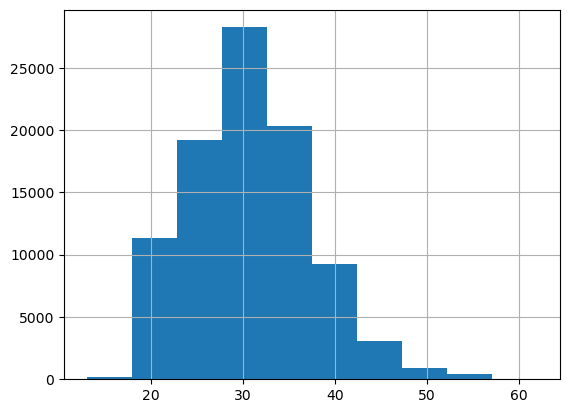

In [29]:
formatted_df['first_part_len'].hist()

In [30]:
(formatted_df['first_part_len'] >= 49).sum()

984

In [31]:
formatted_df['first_part_len'].describe()

count    92889.000000
mean        30.704088
std          6.517965
min         13.000000
25%         26.000000
50%         31.000000
75%         35.000000
max         62.000000
Name: first_part_len, dtype: float64

In [32]:
long_rows = formatted_df[ formatted_df['first_part_len'] >= 49].index

In [33]:
formatted_df.loc[long_rows, 'first_part_len'].describe()

count    984.000000
mean      51.638211
std        2.237933
min       49.000000
25%       50.000000
50%       52.000000
75%       53.000000
max       62.000000
Name: first_part_len, dtype: float64

In [34]:
formatted_df['first_part'] = formatted_df['first_part'].str.ljust(50)

In [35]:
formatted_df['first_part']

table_index       
0            0        000050 01  ABSDOMN                            ...
             0        000100      05  ST-CTY-CDE-FMHA               ...
             1        000200          10  ST-CDE-FMHA               ...
             2        000300          10  CTY-CDE-FMHA              ...
             3        000400      05  NME-CTY                       ...
                                            ...                        
3660         89283    005100      05  RACE-DTRMNTN-CDE              ...
             89284    005200      05  ST-CDE                        ...
             89285    005300      05  FILLER                        ...
             89286    005400      05  CR-REPT-FEE-CDE               ...
             89287    005500      05  PROJ-NBR-GRP-REDFND           ...
Name: first_part, Length: 92889, dtype: object

In [36]:
formatted_df = formatted_df.fillna("")

In [37]:
formatted_df['pic_clauses_len'] = formatted_df['pic_clauses'].apply( len )

<AxesSubplot: >

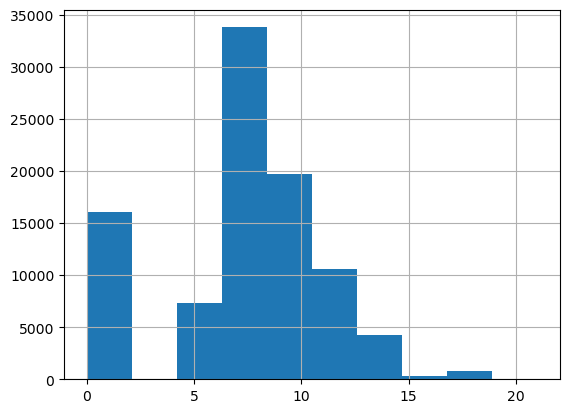

In [38]:
formatted_df['pic_clauses_len'].hist()

In [39]:
formatted_df['first_and_second_part_len'] = formatted_df['first_part_len'] + formatted_df['pic_clauses_len']

In [40]:
formatted_df['first_and_second_part'] = formatted_df['first_part'] + " " + formatted_df['pic_clauses']

In [41]:
formatted_df['first_and_second_part_len'] = formatted_df['first_and_second_part'].apply( len )

<AxesSubplot: >

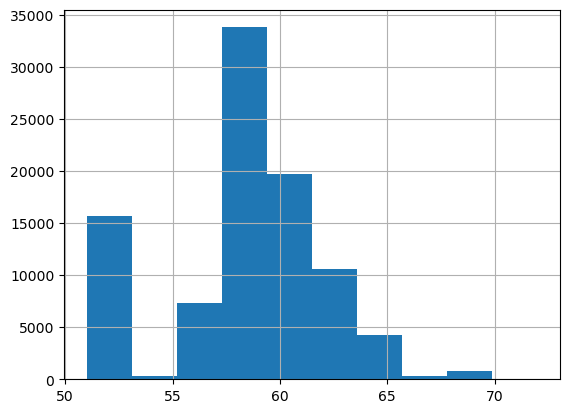

In [42]:
formatted_df['first_and_second_part_len'].hist()

In [43]:
formatted_df['first_and_second_part_len'].describe()

count    92889.000000
mean        58.384911
std          3.857933
min         51.000000
25%         57.000000
50%         59.000000
75%         60.000000
max         72.000000
Name: first_and_second_part_len, dtype: float64

In [44]:
pd.set_option( 'display.max_colwidth', None )

In [45]:
formatted_df['first_and_second_part'].values

array(['000050 01  ABSDOMN                                 ',
       '000100      05  ST-CTY-CDE-FMHA                    ',
       '000200          10  ST-CDE-FMHA                    PIC 9(2)', ...,
       '005300      05  FILLER                             PIC X(0002)',
       '005400      05  CR-REPT-FEE-CDE                    PIC 9(1)',
       '005500      05  PROJ-NBR-GRP-REDFND                PIC 9(4)'],
      dtype=object)

In [46]:
formatted_df.columns

Index(['step_numbers', 'comment_column', 'indent_spaces', 'data_level', 'sep',
       'field_name', 'pic_clauses', 'value_clauses', 'occurs_clauses',
       'redefines_clauses', 'blank_on_clauses', 'indexed_by_clauses',
       'olq_clauses', 'first_part', 'first_part_len', 'pic_clauses_len',
       'first_and_second_part_len', 'first_and_second_part'],
      dtype='object')

In [47]:
trailing_clause_colnames = [
    'value_clauses', 'occurs_clauses',
       'redefines_clauses', 'blank_on_clauses', 'indexed_by_clauses',
       'olq_clauses',
]

In [48]:
trailing_clauses_df = formatted_df[ trailing_clause_colnames ]

In [49]:
non_empty_cells = trailing_clauses_df[ trailing_clause_colnames ].values != ""

In [50]:
trailing_clauses_nparray = trailing_clauses_df[ trailing_clause_colnames ].values.astype( str )

In [51]:
prepended_trailing_clauses_nparray = \
    np.char.add( " ", trailing_clauses_df[ trailing_clause_colnames ].values.astype(str) )

In [52]:
new_trailing_clauses_nparray = np.where(
    non_empty_cells,
    prepended_trailing_clauses_nparray, #if non empty
    "" #if empty
)

In [53]:
new_trailing_clauses_nparray[ non_empty_cells ]

array([' REDEFINES RQST-AREA-MFH', ' OCCURS 4', " VALUE 'A'", ...,
       ' REDEFINES INT-RATE-NOTE', ' REDEFINES RACE-DESC-CDE',
       ' OCCURS 5'], dtype='<U325')

In [54]:
formatted_df[ trailing_clause_colnames ] = new_trailing_clauses_nparray

In [55]:
formatted_df[ 'trailing_clauses_joined' ] = \
    formatted_df[ trailing_clause_colnames ].apply( "".join, axis=1 )

In [56]:
formatted_df[ 'trailing_clauses_joined_len' ] = \
    formatted_df[ 'trailing_clauses_joined' ].apply( len )

In [57]:
sorted( list( formatted_df[ 'trailing_clauses_joined_len' ].values ) )[-10:]

[292, 292, 292, 325, 325, 325, 325, 325, 325, 325]

In [58]:
formatted_df[ 'trailing_clauses_joined' ] = formatted_df[ 'trailing_clauses_joined' ].str.replace( r'\s+', ' ' )

/var/folders/s1/vxj18vbs5glbmwk65x_l6vbc0000gp/T/ipykernel_8336/4184532293.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  formatted_df[ 'trailing_clauses_joined' ] = formatted_df[ 'trailing_clauses_joined' ].str.replace( r'\s+', ' ' )


In [59]:
formatted_df[ 'trailing_clauses_joined' ] = formatted_df[ 'trailing_clauses_joined' ].str.replace( '"\'', '\'' )
formatted_df[ 'trailing_clauses_joined' ] = formatted_df[ 'trailing_clauses_joined' ].str.replace( '\'"', '\'' )

In [60]:
formatted_df[ 'trailing_clauses_joined_len' ] = \
    formatted_df[ 'trailing_clauses_joined' ].apply( len )

In [61]:
sorted( list( formatted_df[ 'trailing_clauses_joined_len' ].values ) )[-10:]

[117, 117, 117, 121, 121, 121, 121, 121, 121, 121]

In [62]:
formatted_df.loc[
    formatted_df[ 'trailing_clauses_joined_len' ] != 0,
    'trailing_clauses_joined'
].iloc[0]

' REDEFINES RQST-AREA-MFH'

In [63]:
formatted_df['whole_line'] = formatted_df['first_and_second_part'] + \
    formatted_df[ 'trailing_clauses_joined' ]

In [64]:
formatted_df['whole_line_len'] = formatted_df['whole_line'].apply( len )

In [65]:
formatted_df['whole_line_len'].describe()

count    92889.000000
mean        60.674159
std          8.426171
min         51.000000
25%         59.000000
50%         59.000000
75%         61.000000
max        172.000000
Name: whole_line_len, dtype: float64

In [66]:
(formatted_df['whole_line_len'] > 79 ).sum()

3630

In [67]:
formatted_df['dotted_whole_line'] = formatted_df['whole_line'].str.strip() + '.'

In [68]:
formatted_df[ 'dotted_whole_line' ] = formatted_df[ 'dotted_whole_line' ].astype( str )

In [69]:
formatted_df[ 'dotted_whole_line' ] = formatted_df[ 'dotted_whole_line' ].str.replace( r'^"', '' )
formatted_df[ 'dotted_whole_line' ] = formatted_df[ 'dotted_whole_line' ].str.replace( r'"$', '' )

/var/folders/s1/vxj18vbs5glbmwk65x_l6vbc0000gp/T/ipykernel_8336/3480837717.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  formatted_df[ 'dotted_whole_line' ] = formatted_df[ 'dotted_whole_line' ].str.replace( r'^"', '' )
/var/folders/s1/vxj18vbs5glbmwk65x_l6vbc0000gp/T/ipykernel_8336/3480837717.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  formatted_df[ 'dotted_whole_line' ] = formatted_df[ 'dotted_whole_line' ].str.replace( r'"$', '' )


In [85]:
formatted_df['dotted_whole_line'].to_csv("2023-01-10_Coletta_IDMS_all_scraped_copybooks.csv", header=False, index=False )

In [71]:
formatted_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 92889 entries, (0, 0) to (3660, 89287)
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   step_numbers                 92889 non-null  object
 1   comment_column               92889 non-null  object
 2   indent_spaces                92889 non-null  object
 3   data_level                   92889 non-null  object
 4   sep                          92889 non-null  object
 5   field_name                   92889 non-null  object
 6   pic_clauses                  92889 non-null  object
 7   value_clauses                92889 non-null  object
 8   occurs_clauses               92889 non-null  object
 9   redefines_clauses            92889 non-null  object
 10  blank_on_clauses             92889 non-null  object
 11  indexed_by_clauses           92889 non-null  object
 12  olq_clauses                  92889 non-null  object
 13  first_part        

In [72]:
formatted_df

step_numbers comment_column indent_spaces data_level sep  \
table_index                                                                  
0           0           000050                                      01       
            0           000100                                      05       
            1           000200                                      10       
            2           000300                                      10       
            3           000400                                      05       
...                        ...            ...           ...        ...  ..   
3660        89283       005100                                      05       
            89284       005200                                      05       
            89285       005300                                      05       
            89286       005400                                      05       
            89287       005500                                      05       

                            field_name  pic_clauses value_clauses  \
table_index                                                         
0           0                  ABSDOMN                              
            0          ST-CTY-CDE-FMHA                              
            1              ST-CDE-FMHA     PIC 9(2)                 
            2             CTY-CDE-FMHA     PIC 9(3)                 
            3                  NME-CTY    PIC X(20)                 
...                                ...          ...           ...   
3660        89283     RACE-DTRMNTN-CDE        PIC X                 
            89284               ST-CDE     PIC 9(2)                 
            89285               FILLER  PIC X(0002)                 
            89286      CR-REPT-FEE-CDE     PIC 9(1)                 
            89287  PROJ-NBR-GRP-REDFND     PIC 9(4)                 

                  occurs_clauses redefines_clauses  ...  \
table_index                                         ...   
0           0                                       ...   
            0                                       ...   
            1                                       ...   
            2                                       ...   
            3                                       ...   
...                          ...               ...  ...   
3660        89283                                   ...   
            89284                                   ...   
            89285                                   ...   
            89286                                   ...   
            89287                                   ...   

                                                           first_part  \
table_index                                                             
0           0      000050 01  ABSDOMN                                   
            0      000100      05  ST-CTY-CDE-FMHA                      
            1      000200          10  ST-CDE-FMHA                      
            2      000300          10  CTY-CDE-FMHA                     
            3      000400      05  NME-CTY                              
...                                                               ...   
3660        89283  005100      05  RACE-DTRMNTN-CDE                     
            89284  005200      05  ST-CDE                               
            89285  005300      05  FILLER                               
            89286  005400      05  CR-REPT-FEE-CDE                      
            89287  005500      05  PROJ-NBR-GRP-REDFND                  

                  first_part_len pic_clauses_len first_and_second_part_len  \
table_index                                                                  
0           0                 18               0                        51   
            0                 31               0                        51   
            1                 31               8                        59 

In [73]:
formatted_df = formatted_df[ [ 'dotted_whole_line' ] ].copy() 

In [74]:
formatted_df

dotted_whole_line
table_index                                                                       
0           0                                                  000050 01  ABSDOMN.
            0                                     000100      05  ST-CTY-CDE-FMHA.
            1         000200          10  ST-CDE-FMHA                    PIC 9(2).
            2         000300          10  CTY-CDE-FMHA                   PIC 9(3).
            3        000400      05  NME-CTY                            PIC X(20).
...                                                                            ...
3660        89283        005100      05  RACE-DTRMNTN-CDE                   PIC X.
            89284     005200      05  ST-CDE                             PIC 9(2).
            89285  005300      05  FILLER                             PIC X(0002).
            89286     005400      05  CR-REPT-FEE-CDE                    PIC 9(1).
            89287     005500      05  PROJ-NBR-GRP-REDFND                PIC 9(4).

[92889 rows x 1 columns]

In [75]:
formatted_df[ 'line_len' ] = formatted_df[ 'dotted_whole_line' ].apply( len )

In [76]:
too_wide_lines = formatted_df.loc[ (formatted_df[ 'line_len' ] > 80), 'dotted_whole_line' ]

In [77]:
too_wide_lines

table_index       
5            127       000400          10  DST-OFC-MAILG                  PIC 9(3) REDEFINES CTY-OFC-MAILG.
29           701         001300      05  USER-BAL-AMT                       PIC ZZZZ,ZZZ,ZZZ.99- OCCURS 15.
30           714         000300      05  VRFCTN-AMT                         PIC ZZZZ,ZZZ,ZZZ.99- OCCURS 15.
31           724       000900          10  DST-OFC-MAILG                  PIC 9(3) REDEFINES CTY-OFC-MAILG.
94           2683      000900      05  PYMT-AMT                           PIC X(7) REDEFINES PRIN-PYMT-AMT.
                                                              ...                                          
3658         89159     003900      05  TAX-EXEMPT-CDE                     PIC 9(1) REDEFINES RACE-DESC-CDE.
3659         89210    003300      05  INT-RATE-NOTE-1ST                  PIC V9(6) REDEFINES INT-RATE-NOTE.
             89216     003900      05  TAX-EXEMPT-CDE                     PIC 9(1) REDEFINES RACE-DESC-CDE.
3660     

In [78]:
test_str = too_wide_lines.iloc[7]

In [79]:
print( test_str )

001900      03  UNI-UMBR-OLD-NEW                   PIC X(13) VALUE '(O-OLD/N-NEW)'.


In [80]:
test_str[60:65]

' VALU'

In [81]:
too_wide_lines.to_csv("too_wide.csv", header=False, index=False )

In [82]:
!head -400 too_wide.csv

000400          10  DST-OFC-MAILG                  PIC 9(3) REDEFINES CTY-OFC-MAILG.
"001300      05  USER-BAL-AMT                       PIC ZZZZ,ZZZ,ZZZ.99- OCCURS 15."
"000300      05  VRFCTN-AMT                         PIC ZZZZ,ZZZ,ZZZ.99- OCCURS 15."
000900          10  DST-OFC-MAILG                  PIC 9(3) REDEFINES CTY-OFC-MAILG.
000900      05  PYMT-AMT                           PIC X(7) REDEFINES PRIN-PYMT-AMT.
"007200                      88  AGR-NEXT-SYSTEM-FUNC  VALUE ['F', 'B', 'O', 'U', 'R', 'T', 'Q']."
001800      03  UNI-UMBR-SWITCH                    PIC X(12) VALUE 'SWITCH TASK:'.
001900      03  UNI-UMBR-OLD-NEW                   PIC X(13) VALUE '(O-OLD/N-NEW)'.
004600      03  AW-PF-TABLE                        PIC X(24) VALUE '123456789:#@ABCDEFGHI.<'.
000600      05  ALTMT-CDE-KEY-RA-MFH                REDEFINES ALTMT-CDE-KEY-LN-GRT-MFH.
001000      05  ALTMT-CDE-CST-ITEM-MFH              REDEFINES ALTMT-CDE-KEY-LN-GRT-MFH.
001700      05  ALTMT-LDGR-DTL        

# Next steps as of Wed Jan 11

* fix line items where valid values are listed in a single line ... expand out to multiple lines e.g. ```VALUE ['00', '19', '64', '51' THRU '55',...``` each has their own line item
* Line items that exceed 80 characters should have continuations onto the next line.
* Pull in table metadata "2022-12-15_IDMS_table_descriptions.xlsx" and output and organize/coallate copybooks based on PLAS sybsystems

In [83]:
#!head -400 test.csv

In [ ]:
!wc -l test.csv

In [ ]:
# metadata = pd.read_excel( '2022-12-15_IDMS_table_descriptions.xlsx', index_col=0 )

# metadata[ ['table_names', 'table_vers' ]].values[:10]

# table_id_to_name_dict = dict( zip( metadata.index, metadata['table_names'].values ) )

# metadata